# Imports

### Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
train_df_raw = pd.read_csv("../data/train.csv")
train_df_raw.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Cleaning the Data

### Visualizing nulls values

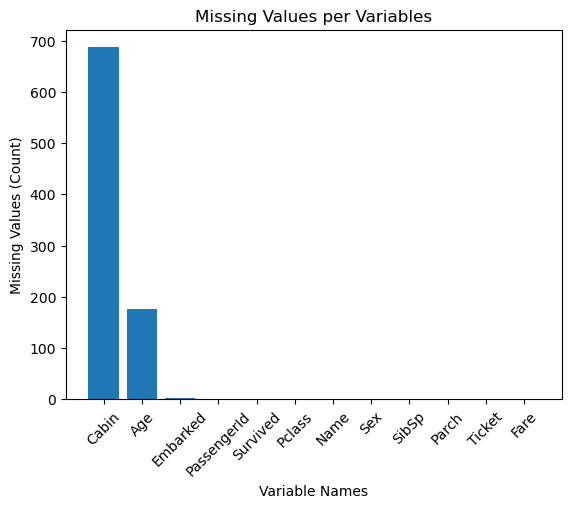

In [13]:
# Slice out data
nulls_series = train_df_raw.isnull().sum().sort_values(ascending=False)

# Format figure
plt.title("Missing Values per Variables")
plt.xlabel("Variable Names")
plt.ylabel("Missing Values (Count)")
plt.xticks(rotation=45)

# Graph data
plt.bar(x=nulls_series.index, height=nulls_series.values)
plt.show()

### Checking which column is most empty

In [14]:
num_nan_cells = max(nulls_series)
most_nan_values = nulls_series[nulls_series == num_nan_cells].index.values[0]
print(f"Column '{most_nan_values}' has the most NaN values at {num_nan_cells} NaNs.")

Column 'Cabin' has the most NaN values at 687 NaNs.


### Deleting all rows where Embarked is empty

In [15]:
print(f"Before cleaning empty Embarked: {train_df_raw.shape}")
train_df_embark_cleaned = train_df_raw[~train_df_raw["Embarked"].isnull()]
print(f"After cleaning empty Embarked: {train_df_embark_cleaned.shape}")

Before cleaning empty Embarked: (891, 12)
After cleaning empty Embarked: (889, 12)


### Filling all empty cabins with ¯\ (ツ)/¯

In [16]:
train_df_cabins_cleaned = train_df_embark_cleaned.copy()
train_df_cabins_cleaned["Cabin"].replace(np.nan, "¯\(ツ)/¯", inplace=True)
train_df_cabins_cleaned.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S


# Feature extraction

### FamilyCount

In [17]:
train_df_family_col = train_df_cabins_cleaned.copy()
train_df_family_col["FamilyCount"] = train_df_family_col["SibSp"] + train_df_family_col["Parch"]
train_df_family_col.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0


### IsReverend

In [18]:
train_df_rev_col = train_df_family_col.copy()
train_df_rev_col["IsReverend"] = train_df_rev_col["Name"].str.contains("Rev.").astype("int")
train_df_rev_col.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0


### Embarked_C, Embarked_Q and Embarked_S.

In [19]:
train_df_embark_dummies = train_df_rev_col.copy()
dummy_cols = pd.get_dummies(train_df_embark_dummies["Embarked"])
for col in list(dummy_cols.columns):
    train_df_embark_dummies[f"Embarked_{col}"] = dummy_cols[col]
print(train_df_embark_dummies.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


### Sex

In [20]:
train_df_sex_dummies = train_df_embark_dummies.copy()
dummy_cols = pd.get_dummies(train_df_sex_dummies["Sex"])
for col in list(dummy_cols.columns):
    train_df_sex_dummies[f"Is_{col}"] = dummy_cols[col]
print(train_df_sex_dummies.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Is_female',
       'Is_male'],
      dtype='object')


### Forming Features Based on Titles

In [21]:
train_df_title_dummies = train_df_sex_dummies.copy()
list_titles = [i.split(", ")[1].split(".")[0].replace(" ", "_") for i in train_df_title_dummies["Name"].values]
dummy_cols = pd.get_dummies(list_titles)
for col in list(dummy_cols.columns):
    train_df_title_dummies[f"Is_{col}"] = dummy_cols[col]
print(train_df_title_dummies.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Is_female',
       'Is_male', 'Is_Capt', 'Is_Col', 'Is_Don', 'Is_Dr', 'Is_Jonkheer',
       'Is_Lady', 'Is_Major', 'Is_Master', 'Is_Miss', 'Is_Mlle', 'Is_Mme',
       'Is_Mr', 'Is_Mrs', 'Is_Ms', 'Is_Rev', 'Is_Sir', 'Is_the_Countess'],
      dtype='object')


In [22]:
cleaned_titanic = train_df_title_dummies.copy()
cleaned_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Is_Master,Is_Miss,Is_Mlle,Is_Mme,Is_Mr,Is_Mrs,Is_Ms,Is_Rev,Is_Sir,Is_the_Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA: Stats

### Overall Survival Rate

In [23]:
survival_rate = cleaned_titanic["Survived"].value_counts(normalize=True)[1]
print(f"The overall survival rate was about {round(survival_rate*100,2)}% overall.")

The overall survival rate was about 38.25% overall.


### Survival Rate by Gender

In [24]:
survival_by_gender_series = cleaned_titanic.groupby("Sex")["Survived"].value_counts(normalize=True).reset_index(name="Count")
worst_survival_rate_gender, col, worst_survival_rate = survival_by_gender_series[survival_by_gender_series["Survived"] == 1].sort_values("Count").iloc[0].values
print(f"The worst survival rate by gender belonged to {worst_survival_rate_gender} at about {round(worst_survival_rate*100,2)}%.")

The worst survival rate by gender belonged to male at about 18.89%.


### Survival Rate by Class

In [25]:
survival_by_pclass_df = cleaned_titanic.groupby("Pclass")["Survived"].value_counts(normalize=True).reset_index(name="Count")
for pclass_row in survival_by_pclass_df[survival_by_pclass_df["Survived"] == 1].sort_values("Count", ascending=False).values:
    print(f"The {int(pclass_row[0])}-class had a survival rate of about {round(pclass_row[2]*100,2)}%.")

The 1-class had a survival rate of about 62.62%.
The 2-class had a survival rate of about 47.28%.
The 3-class had a survival rate of about 24.24%.


### Survival Rate by Reverends

In [26]:
survival_by_reverend_df = cleaned_titanic.groupby("IsReverend")["Survived"].sum().reset_index()
num_rev_survived = survival_by_reverend_df[survival_by_reverend_df["IsReverend"] == 1].values[0][1]
print(f"{num_rev_survived} reverends survived.")

0 reverends survived.


### Survival Rate for Empty Cabins (¯\ (ツ)/¯)

In [27]:
survival_by_empty_cabin_df = cleaned_titanic.groupby("Cabin")["Survived"].value_counts(normalize=True).reset_index(name="Count")
empty_cabin_survival_rate = survival_by_empty_cabin_df[(survival_by_empty_cabin_df["Survived"] == 1) & (survival_by_empty_cabin_df["Cabin"] == "¯\(ツ)/¯")].values[0][2]
print(f"The survival rate for cabins marked ¯\(ツ)/¯ is around {round(empty_cabin_survival_rate*100, 2)}%.")

The survival rate for cabins marked ¯\(ツ)/¯ is around 29.99%.


### Survival Rate by "Null Aged" People

In [28]:
survival_by_null_age_df = cleaned_titanic[cleaned_titanic["Age"].isna()]["Survived"].value_counts(normalize=True).reset_index(name="Count")
empty_age_survival_rate = survival_by_null_age_df[survival_by_null_age_df["index"] == 1].values[0][1]
print(f"The survival rate for empty ages is around {round(empty_age_survival_rate*100, 2)}%.")

The survival rate for empty ages is around 29.38%.


### Survival Rate by Port of Embarkation?

In [29]:
survival_by_embarkation_df = cleaned_titanic.groupby("Embarked")["Survived"].value_counts(normalize=True).reset_index(name="Count")
for embark_row in survival_by_embarkation_df[survival_by_embarkation_df["Survived"] == 1].sort_values("Count", ascending=False).values:
    print(f"The survival rate for embarkation port {embark_row[0]} is around {round((embark_row[2])*100, 2)}%.")

The survival rate for embarkation port C is around 55.36%.
The survival rate for embarkation port Q is around 38.96%.
The survival rate for embarkation port S is around 33.7%.


### Survival Rate by for children (under 12) in each Pclass

In [30]:
survival_by_child_pclass_df = cleaned_titanic[cleaned_titanic["Age"] < 12].groupby("Pclass")["Survived"].value_counts(normalize=True).reset_index(name="Count")
for pclass_row in survival_by_child_pclass_df[survival_by_child_pclass_df["Survived"] == 1].sort_values("Pclass").values:
    print(f"The {int(pclass_row[0])}-class had a survival rate of about {round(pclass_row[2]*100,2)}%.")

The 1-class had a survival rate of about 75.0%.
The 2-class had a survival rate of about 100.0%.
The 3-class had a survival rate of about 40.43%.


### Checking Captain

In [31]:
# assuming only 1 captain
is_captain_on_list = bool(cleaned_titanic[cleaned_titanic["Is_Capt"] == 1].shape[0])
did_captain_survive = bool(cleaned_titanic[cleaned_titanic["Is_Capt"] == 1]["Survived"].values[0])
print(f"Captain is on list: {is_captain_on_list}, and captain did survive: {did_captain_survive}")

Captain is on list: True, and captain did survive: True


### Most Expensive Tickets

In [32]:
expensive_ticked_df = cleaned_titanic[cleaned_titanic["Survived"] == 1]
max_fare = expensive_ticked_df["Fare"].max()
names = expensive_ticked_df[expensive_ticked_df["Fare"] == max_fare]["Name"].values
print(f"The following had the most expensive ticket at ${round(max_fare,2)}:")
for name in names:
    print(name)

The following had the most expensive ticket at $512.33:
Ward, Miss. Anna
Cardeza, Mr. Thomas Drake Martinez
Lesurer, Mr. Gustave J


### Survival Rate by Having Family Onboard?

In [33]:
family_help_hurt_df = cleaned_titanic.groupby("FamilyCount")["Survived"].value_counts().reset_index(name="Count")
no_family_yes_surv_count = family_help_hurt_df[(family_help_hurt_df["FamilyCount"] == 0) & (family_help_hurt_df["Survived"] == 1)].values[0][2]
no_family_no_surv_count = family_help_hurt_df[(family_help_hurt_df["FamilyCount"] == 0) & (family_help_hurt_df["Survived"] == 0)].values[0][2]
no_family_survival_chance = no_family_yes_surv_count / (no_family_yes_surv_count + no_family_no_surv_count)

yes_family_yes_surv_count = family_help_hurt_df[(family_help_hurt_df["FamilyCount"] == 1) & (family_help_hurt_df["Survived"] == 1)].values[0][2]
yes_family_no_surv_count = family_help_hurt_df[(family_help_hurt_df["FamilyCount"] == 1) & (family_help_hurt_df["Survived"] == 0)].values[0][2]
yes_family_survival_chance = yes_family_yes_surv_count / (yes_family_yes_surv_count + yes_family_no_surv_count)

if no_family_survival_chance == yes_family_survival_chance:
    print(f"Neither; both have the same effect on chances of survival.")
elif no_family_survival_chance >= yes_family_survival_chance:
    print(f"Having family helps you.")
else:
    print(f"Having family hurts you.")

Having family hurts you.


# EDA: Visuals

### Plotting

In [34]:
# Global Plotting Variables
title_size = 18
axes_size = 14
tick_size = 10
subplot_width = 8
subplot_height = 5

#### EDA (Heatmap)

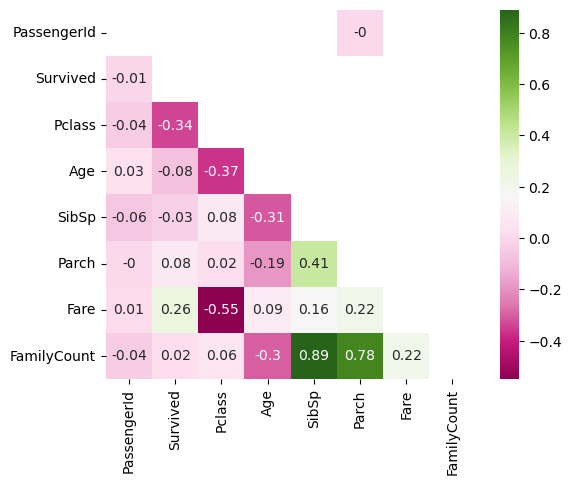

In [35]:
corrs_df = round(cleaned_titanic.loc[:, :"FamilyCount"].corr(), 2)
mask = np.triu(corrs_df)
sns.heatmap(corrs_df, mask=mask, cmap="PiYG", annot=True, square=True)
plt.show()

#### Distributions

##### Custom Barchart Function

In [36]:
def chris_titanic_barchart(group_title: str, group_xlabel: str, group_col: str) -> None:
    """ 
    Function Use:
    Plots a stacked barchart comparing the survival percentages to any single given category.
    Compatible with only the dataframe: cleaned_titanic (created previously in this notebook).

    Inputs:
    group_title: STR = Name of category to be included in the title.
    group_xlabel: STR = Name of category to be included in the xlabel.
    group_col: STR = Name category within the cleaned_titanic dataframe.

    Returns:
    None
    """
    # Figure Setup
    plt.figure(figsize=(subplot_width, subplot_height))
    plt.title(f"Titanic Passenger Survival Rates by {group_title}", size=title_size)
    plt.ylabel(f"Survival Rate", size=axes_size)
    plt.xlabel(f"{group_xlabel}", size=axes_size)
    plt.grid(alpha=0.25)

    # Splicing out relevant df from whole df
    plot_df = cleaned_titanic.groupby(group_col)["Survived"].value_counts(normalize=True).reset_index(name="Count")

    # Splicing out graph data xy from relevant df
    survival_xys = []
    if len(set(plot_df[group_col].values)) > 10: # if too many x-values, we will bin
        print("YO")
        bins = [*range(0,110,10)]
        plot_df = cleaned_titanic.groupby(pd.cut(cleaned_titanic[group_col], bins=bins))["Survived"].mean().reset_index()
        # source on how to rebin https://stackoverflow.com/questions/62602029/pandas-re-binning-a-dataframe
        plot_df.dropna(inplace=True) # because we use mean, any rows w NaN as means there were no passengers in that list, so we can drop
        plot_df["Not_survived"] = 1 - plot_df["Survived"]
        x_values = [" - ".join(str(i).replace("(", "").replace("]","").split(", ")) for i in plot_df["Age"]]
        survival_xys.append([x_values, plot_df["Not_survived"].values.tolist()])
        survival_xys.append([x_values, plot_df["Survived"].values.tolist()])
    else: # else, since we're not binning, we'll plot normally
        x_values = []
        for i in plot_df[group_col].values:
            if i not in x_values:
                x_values.append(i)

        for i in range(2): # since survived is binary, 0,1 to track when dead/alive
            temp_ys = []
            for x_value in x_values:
                y = plot_df[(plot_df["Survived"] == i) & (plot_df[group_col] == x_value)]["Count"]
                if y.empty:
                    y = 0
                else:
                    y = y.values[0]
                temp_ys.append(y)
            survival_xys.append([x_values, temp_ys])

    # Plotting bar graph
    plt.bar([str(i) for i in survival_xys[1][0]], survival_xys[1][1], color ="g", alpha=0.5, label="Survived")
    plt.bar([str(i) for i in survival_xys[0][0]], survival_xys[0][1], color ="r", alpha=0.5, label="Not Survived", bottom=survival_xys[1][1])

    # Legend + Annotation of survival values
    plt.legend(loc=[1.02, 0.5])
    bottom_bar_lengths = survival_xys[1][1]
    top_bar_lengths = survival_xys[0][1]
    for i in range(len(x_values)):
        plt.annotate(f"{round(bottom_bar_lengths[i]*100,1)}%", xy=[i, bottom_bar_lengths[i]/2], ha="center")
        plt.annotate(f"{round(top_bar_lengths[i]*100,1)}%", xy=[i, bottom_bar_lengths[i] + top_bar_lengths[i]/2], ha="center")

    # Output
    plt.tight_layout()
    plt.savefig(f"../repo/screenshots/bar_{group_col.lower()}.png")
    plt.show()
    return

##### Graphs

YO


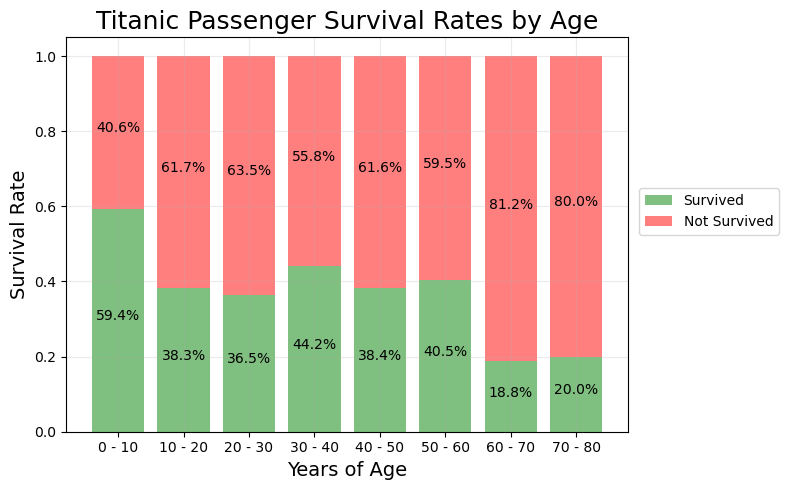

In [37]:
group_title = "Age"
group_xlabel = "Years of Age"
group_col = "Age"
chris_titanic_barchart(group_title, group_xlabel, group_col)

*Interpretation: The barchart shows that on general, as you move down the age category, you're more likely to not survive. In other words, being younger means you have a higher likelihood of surviving when compared to older age categories.*

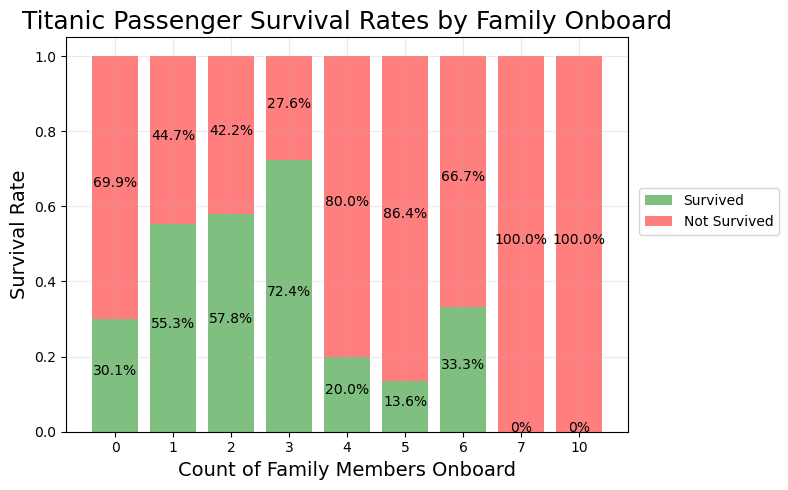

In [38]:
group_title = "Family Onboard"
group_xlabel = "Count of Family Members Onboard"
group_col = "FamilyCount"
chris_titanic_barchart(group_title, group_xlabel, group_col)

*Interpretation: The barchart suggests that having between 1-3 other family members on board increased the chances of your survival.*

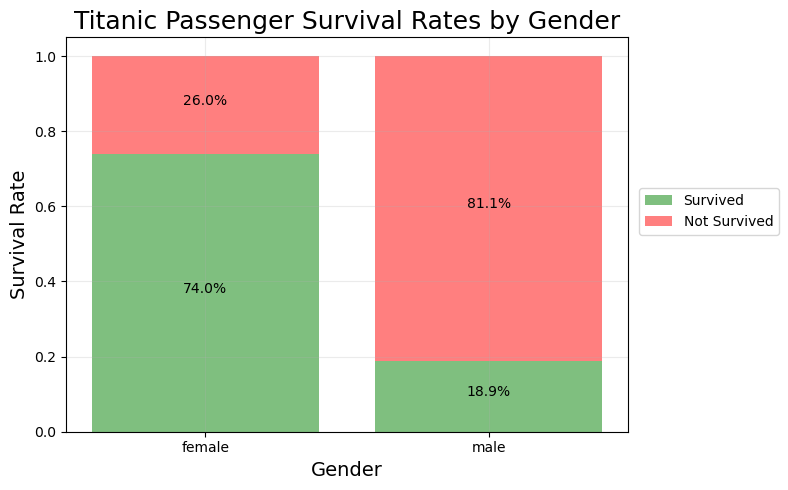

In [39]:
group_title = "Gender"
group_xlabel = "Gender"
group_col = "Sex"
chris_titanic_barchart(group_title, group_xlabel, group_col)

*Interpretation: The barchart suggests that females had a significant advantage in survival. From history trivia, I also know that there was an order to send women and children to the lifeboats first, so this data tracks that.*

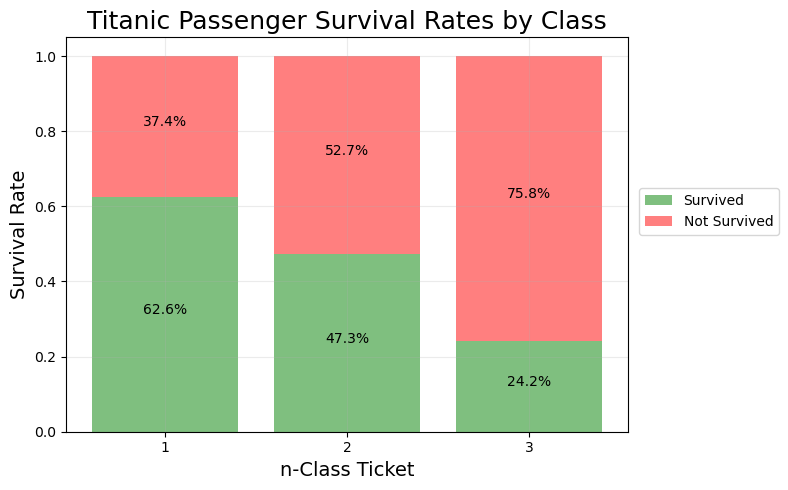

In [40]:
group_title = "Class"
group_xlabel = "n-Class Ticket"
group_col = "Pclass"
chris_titanic_barchart(group_title, group_xlabel, group_col)

*Interpretation: This barchart shows that the higher class you were, the more likely you were to survive.*

#### Beneath Surface Conclusions

From the barcharts above, it seems like your titanic survival was influenced by several factors. Namely: as your wealth (class) increased, was female, was younger, and had between 1-3 other family members on board, you were more likely to survive.